Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.57379 154.207; 7.57379 154.207; … ; 7.58432 154.514; 7.58119 154.955]

Union{Missing, Float64}[7.93556 153.458; 7.6149 154.417; … ; 8.03683 154.678; 7.77507 154.645]

Union{Missing, Float64}[8.01297 154.703; 7.57114 154.374; … ; 7.41239 155.063; 7.77386 155.144]

Union{Missing, Float64}[8.35248 154.408; 8.36572 154.336; … ; 7.62793 154.632; 8.03556 153.937]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE       MCSE      ESS
sigma   7.7725723 0.30757808 0.0048632364 0.0049395394 1000
   mu 154.5977353 0.41213125 0.0065163672 0.0057507151 1000

Quantiles:
          2.5%       25.0%      50.0%      75.0%       97.5%  
sigma   7.2144003   7.560655   7.754405   7.9778275   8.423854
   mu 153.8139000 154.322750 154.602500 154.8722500 155.437000



Plot the density of posterior draws

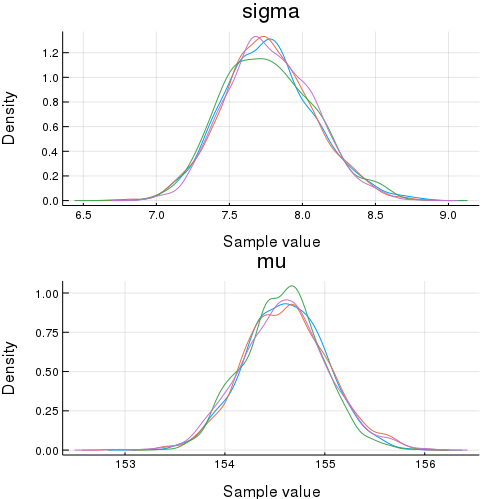

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.16140317695195205
 0.09732688298288848

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
  1.0         -0.00577249
 -0.00577249   1.0       

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*